# Task 03 ************ Sales Price Prediction *************

In [2]:
#import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [3]:
# Read the .csv datafile
df=pd.read_csv('Advertising.csv',encoding_errors= 'replace',usecols=["TV","Radio","Newspaper","Sales"])

In [4]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
#find the dimension of dataset
df.shape

(200, 4)

In [6]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
#Drop the duplicate values 
df.drop_duplicates(inplace=True)
df.shape

(200, 4)

In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


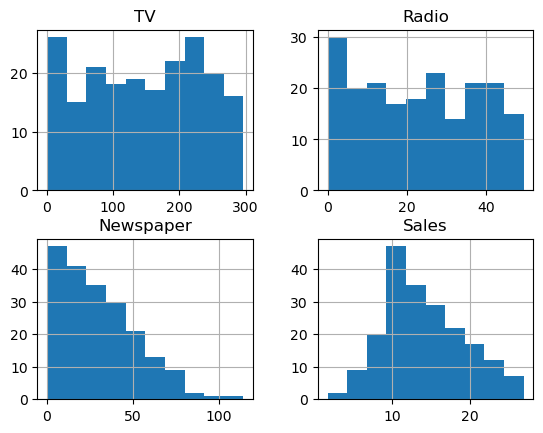

In [10]:
# Histogram of each column
df.hist()
plt.show()

<Axes: xlabel='Newspaper', ylabel='Sales'>

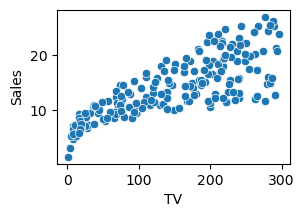

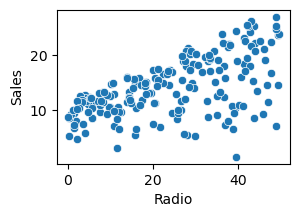

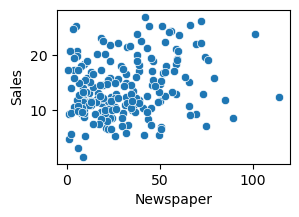

In [11]:
# plot the scatter plot between the tv vs sales , radio vs sales and news paper vs sales
plt.figure(figsize=(3,2))
sns.scatterplot(data=df,x=df['TV'],y=df['Sales'])

plt.figure(figsize=(3,2))
sns.scatterplot(data=df,x=df['Radio'],y=df['Sales'])

plt.figure(figsize=(3,2))
sns.scatterplot(data=df,x=df['Newspaper'],y=df['Sales'])


<Axes: >

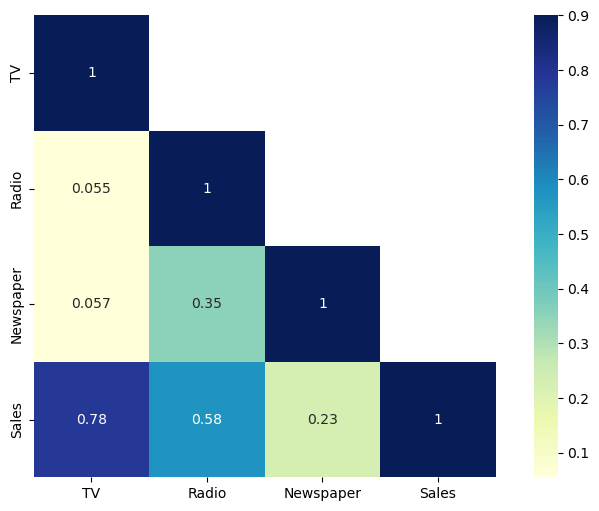

In [12]:
# Heatmap and correlation
corr = df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,6)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [13]:
Input = df[['TV', 'Radio', 'Newspaper']]
Output = df[['Sales']]

In [14]:
#train and test the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Input,Output,random_state=0)

In [15]:
#find te dimension of x_train aand x_test
x_train.shape ,x_test.shape

((150, 3), (50, 3))

In [16]:
y_train.shape , y_test.shape

((150, 1), (50, 1))

In [17]:
#using logistic regression
from sklearn.linear_model import LinearRegression
my_model = LinearRegression()
my_model.fit(x_train, y_train)

LinearRegression()

In [18]:
prediction = my_model.predict(x_test)


In [19]:
#find mean square error
from sklearn.metrics import mean_squared_error
mean_squared_error(prediction, y_test)

4.0124975229171005

In [20]:
#find r2_score
from sklearn.metrics import r2_score
# find Coefficient of Determination or R Squared Value (r2)
r2_score(y_test,prediction)

0.8576396745320893